# Central limit theorem 

## Formulation

Let's take $N$ **independent** values $x_i$ belonging to the same distribution with mathematical expectation $\mu$ and standard deviation $\sigma$.

Let's denote their sum:

$$S_N = \sum_{i=1}^n x_i$$

Central limit theorem says that $S_N \sim N(\mu N; \sigma^2 N)$ ($S_N$ belongs to normal distibution with parameters $\mu N, \sigma^2 N$).

## Numerical proof

Let's create samples of means of samples from different distributions and explore their characteristics. 

We will plot the histogram of the sample of sums and perform the Cramér-von Mises test to understand if $S_N$ belongs to the normal distribution.

The $H_0$ of the Cramér-von Mises test in our case is that $S_N$ is normally distributed, so if $p>0.05$ we cannot reject this hypothesis.

In [41]:
import numpy as np

import scipy
from scipy.stats import shapiro, anderson
from scipy.stats import cramervonmises

import seaborn as sns
import matplotlib.pyplot as plt

def explore_is_normal(
    mu : float, sigma : float, 
    sample : np.array, orig_distr_name: str
    ):
    """
    Function that returns whether the given sample
    belongs to the normal distribution. It plots the
    histogram of the distribution and prints the result of the
    of the Cramér-von Mises test in the title.
    Parameters
    ----------
    mu (float) : mathematical expectation of original random value;
    sigma (float) : standart deviation of original random value;
    sample (numpy.array) : sample of sums of original samples;
    orig_distr_name (str) : name of original distribution
        will be pritned on the title of the figure.

    Returns
    ---------
    Plotted histogram of exploring sample.
    """
    s_len = len(sample)
    test_p = cramervonmises(
        sample,
        cdf=scipy.stats.norm(
            mu*s_len,sigma*(s_len**(1/2))
        ).cdf
    ).pvalue
    
    sns.histplot(sample, kde=True)
    plt.title(
        f"Original distr. - {orig_distr_name};" 
        f" Test result $p={str(round(test_p,2))}$"
    )

### Normal distribution

This shows that the sum of the random values sampled from the normal distribution belongs to the normal distribution.

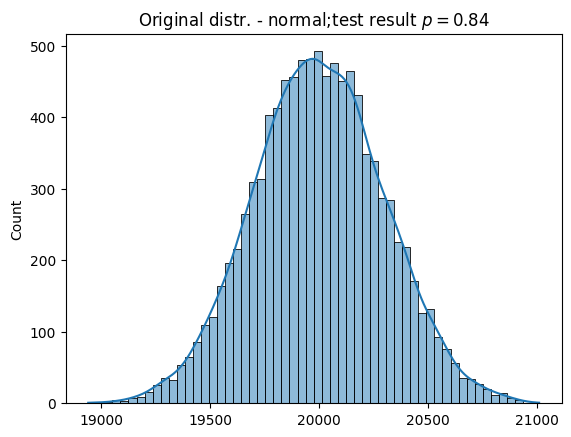

In [36]:
sample = np.random.normal(
    2, 3, (10000, 10000)
).sum(axis = 1)
explore(2, 3, sample, "normal")

### Poisson distribution

For this research, it is important that this distribution parameters are $\mu=\lambda$ and $\sigma=\sqrt{\lambda}$.

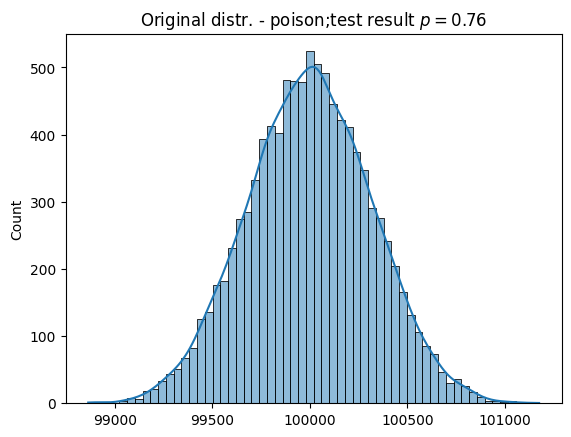

In [46]:
_lambda = 10
sample = np.random.poisson(
    _lambda, (10000, 10000)
).sum(axis = 1)
explore(_lambda, _lambda**(1/2), sample, "poison")